# HW0:  Python Installation, Set and Review of CS133
## CS 233 Essentials of Data Science
### Spring 2024

# This HW is worth 10 points. 

To you help you get through the problems, **some outputs are deliberately included in this notebook**.

If you find that you cannot complete a question that later questions rely on, please attempt to do all of the questions anyway. I will award partial credit to answers, even if they don't run correctly due to reliance on earlier questions.

Python questions may require more lines than one line of code to answer.

In [1]:
# Run this cell to set up the notebook, but please don't change it.
# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)


## Data Analsyis: Child Race Data

### a. Load Data

<u>**Question 1. (pt 2)**</u> :

Load data from the file *children_raw.csv* into a *DataFrame* called `raw_child_data`. 

In [2]:
raw_child_data = Table.read_table("children_raw.csv")
raw_child_data

State,White,Black,Hispanic,Other,Total
Alabama,712200,362100,76100,36700,1187100
Alaska,88600,5000,23100,75800,192600
Arizona,571200,60000,936800,159600,1727500
Arkansas,463800,134000,75800,62000,735700
California,2786000,484200,4849400,1590100,9709700
Colorado,740500,66400,422900,116500,1346300
Connecticut,523600,71500,175400,72500,843000
Delaware,112600,48300,37300,17700,215800
District of Columbia,31200,68800,18000,5700,123800
Florida,1944100,905700,1327300,214100,4391100


<u>**Question 2. (pt 2)**</u> :

Create new table called `child_data` that uses data from `raw_child_data` to calculate what fraction each race represents in the child population for each state. The columns in the new table should be called `Fraction White`, `Fraction Black`, etc. 

In [4]:
child_data = raw_child_data.with_columns(
    'Fraction White', raw_child_data.column('White')/raw_child_data.column('Total'),
    'Fraction Black', raw_child_data.column('Black')/raw_child_data.column('Total'),
    'Fraction Hispanic', raw_child_data.column('Hispanic')/raw_child_data.column('Total'),
    'Fraction Other', raw_child_data.column('Other')/raw_child_data.column('Total')
)
child_data

State,White,Black,Hispanic,Other,Total,Fraction White,Fraction Black,Fraction Hispanic,Fraction Other
Alabama,712200,362100,76100,36700,1187100,0.599949,0.305029,0.0641058,0.0309157
Alaska,88600,5000,23100,75800,192600,0.460021,0.0259605,0.119938,0.393562
Arizona,571200,60000,936800,159600,1727500,0.330651,0.0347323,0.542287,0.0923878
Arkansas,463800,134000,75800,62000,735700,0.63042,0.182139,0.103031,0.0842735
California,2786000,484200,4849400,1590100,9709700,0.28693,0.0498677,0.499439,0.163764
Colorado,740500,66400,422900,116500,1346300,0.550026,0.0493204,0.31412,0.0865335
Connecticut,523600,71500,175400,72500,843000,0.621115,0.0848161,0.208066,0.0860024
Delaware,112600,48300,37300,17700,215800,0.521779,0.223818,0.172845,0.0820204
District of Columbia,31200,68800,18000,5700,123800,0.252019,0.555735,0.145396,0.046042
Florida,1944100,905700,1327300,214100,4391100,0.442736,0.206258,0.302271,0.0487577


### b. Analyze Data

Draw a barchart with the fraction of the child populations that are hispanic in green. 

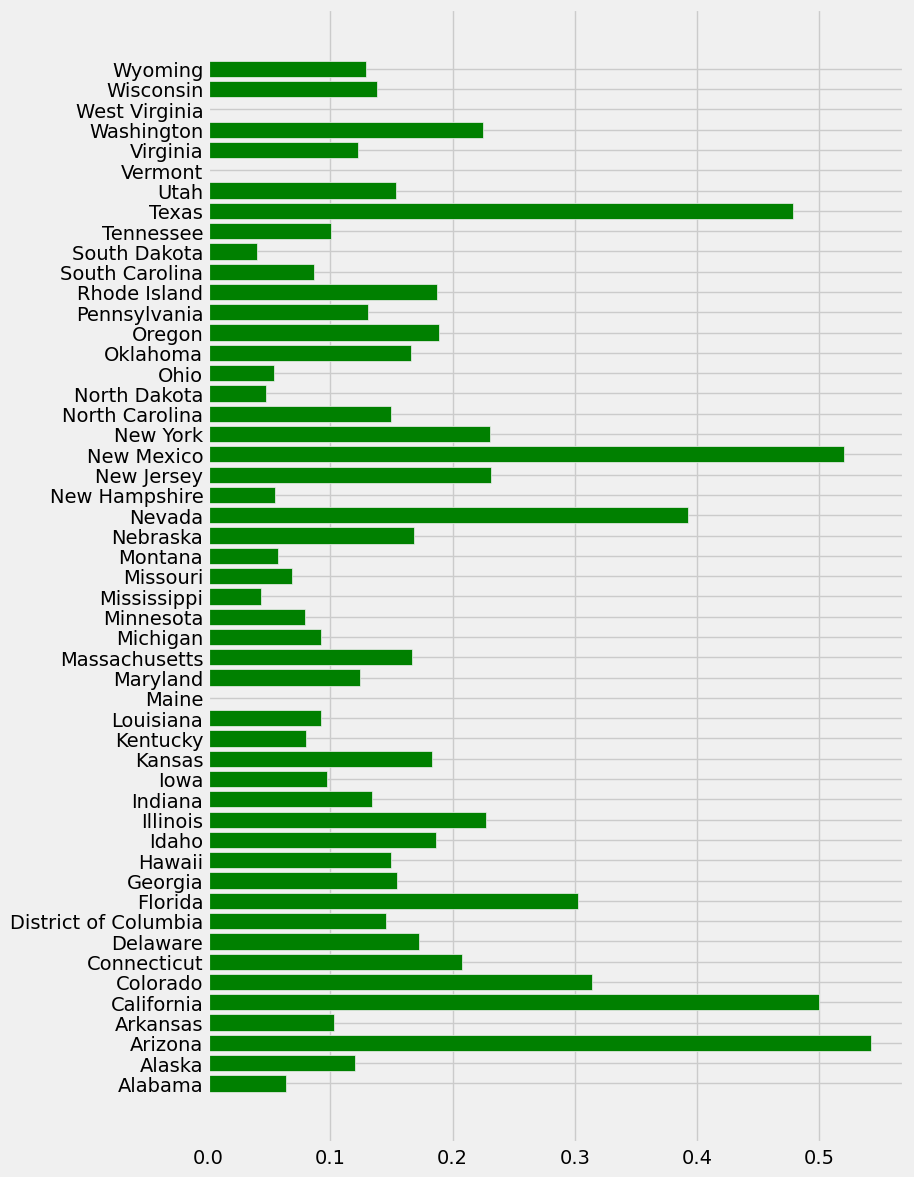

In [29]:
plt.figure(figsize=(8,14))
bars = plt.barh(child_data.column('State'), child_data.column('Fraction Hispanic'), color='green')
plt.show()

<u>**Question 3. (pt 2)**</u> :

Using the plot, which state, excluding the District of Columbia, has the highest fraction of children that are hispanic? 

***The highest fraction of children that are hispanic is Arizona***

<u>**Question 4. (pt 2)**</u> :

Confirm this using Python code. The `?` is just a placeholder. You may need more lines of code.

In [43]:
max_number = child_data.column('Fraction Hispanic').max()
state_raw = child_data.where('Fraction Hispanic', max_number).column('State')
highest_frac_hispanic = str(state_raw[0])
highest_frac_hispanic


'Arizona'

<u>**Question 5. (pt 2)**</u> :

What fraction of the child population rounded to two decimal places is hispanic in this state? 

In [52]:
frac_hispanic = round(max_number, 2)
#format properly
frac_hispanic = '{:.2f}'.format(frac_hispanic)
print("Child population that is hispanic in this state (rounded 2 decimal):" + frac_hispanic)

Child population that is hispanic in this state (rounded 2 decimal):0.54
